<a href="https://colab.research.google.com/github/Q-nicorn1/Sentence-Word-Embedding-/blob/main/Sentence_Encoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install sentencepiece

In [ ]:
!pip3 install sentence_transformers

     |████████████████████████████████| 78 kB 6.0 MB/s 
     |████████████████████████████████| 3.3 MB 38.2 MB/s 
     |████████████████████████████████| 3.3 MB 42.7 MB/s 
     |████████████████████████████████| 61 kB 542 kB/s 
     |████████████████████████████████| 596 kB 36.3 MB/s 
     |████████████████████████████████| 895 kB 39.4 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=4cca77668274693b1d774714fa599ed5b09ebe94700469c26c1c17029724e446
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


#### Import Libraries

In [ ]:
import sentencepiece as spm
import tensorflow_hub as hub

from absl import logging
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from sentence_transformers import SentenceTransformer

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns
import random

# Import NL
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
import numpy as np

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
messages = [
    "That person is a real rock rock star",
    "I did not know the sun was a star",
    "twinkle twinkle little star",
    "please have this star shaped cake"
]

def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

#### Doc2Vec

In [ ]:
# Tokenization of each document
tokenized_sent = []
for s in messages:
    tokenized_sent.append(word_tokenize(s.lower()))
tokenized_sent

[['that', 'person', 'is', 'a', 'real', 'star'],
 ['i', 'did', 'not', 'know', 'the', 'sun', 'was', 'a', 'star'],
 ['twinkle', 'twinkle', 'little', 'star'],
 ['please', 'have', 'this', 'star', 'shaped', 'cake']]

In [ ]:
tagged_data = [TaggedDocument(d, [i]) for i, d in enumerate(tokenized_sent)]
tagged_data

[TaggedDocument(words=['that', 'person', 'is', 'a', 'real', 'star'], tags=[0]),
 TaggedDocument(words=['i', 'did', 'not', 'know', 'the', 'sun', 'was', 'a', 'star'], tags=[1]),
 TaggedDocument(words=['twinkle', 'twinkle', 'little', 'star'], tags=[2]),
 TaggedDocument(words=['please', 'have', 'this', 'star', 'shaped', 'cake'], tags=[3])]

In [ ]:
## Train doc2vec model
model = Doc2Vec(tagged_data, vector_size = 20, window = 2, min_count = 1, epochs = 100)

'''
vector_size = Dimensionality of the feature vectors.
window = The maximum distance between the current and predicted word within a sentence.
min_count = Ignores all words with total frequency lower than this.
alpha = The initial learning rate.
'''

## Print model vocabulary
model.wv.vocab

{'a': <gensim.models.keyedvectors.Vocab at 0x7f8a1e666b10>,
 'cake': <gensim.models.keyedvectors.Vocab at 0x7f8a1e666450>,
 'did': <gensim.models.keyedvectors.Vocab at 0x7f8a1e666890>,
 'have': <gensim.models.keyedvectors.Vocab at 0x7f8a1e666650>,
 'i': <gensim.models.keyedvectors.Vocab at 0x7f8a1e6664d0>,
 'is': <gensim.models.keyedvectors.Vocab at 0x7f8a1e666910>,
 'know': <gensim.models.keyedvectors.Vocab at 0x7f8a1e6665d0>,
 'little': <gensim.models.keyedvectors.Vocab at 0x7f8a1e666710>,
 'not': <gensim.models.keyedvectors.Vocab at 0x7f8a1e666510>,
 'person': <gensim.models.keyedvectors.Vocab at 0x7f8a1e666bd0>,
 'please': <gensim.models.keyedvectors.Vocab at 0x7f8a1e666150>,
 'real': <gensim.models.keyedvectors.Vocab at 0x7f8a1e6662d0>,
 'shaped': <gensim.models.keyedvectors.Vocab at 0x7f8a1e666e90>,
 'star': <gensim.models.keyedvectors.Vocab at 0x7f8a1e666550>,
 'sun': <gensim.models.keyedvectors.Vocab at 0x7f8a1e666fd0>,
 'that': <gensim.models.keyedvectors.Vocab at 0x7f8a1e666e

In [ ]:
test_doc = word_tokenize("star".lower())
test_doc_vector = model.infer_vector(test_doc)
model.docvecs.most_similar(positive = [test_doc_vector])

[(3, 0.3330482840538025),
 (0, 0.06547608971595764),
 (1, -0.05201444402337074),
 (2, -0.08708389848470688)]

#### Define the pre-trained model

In [ ]:
url = "https://tfhub.dev/google/universal-sentence-encoder-large/5" 
model = hub.load(url)
print ("module %s loaded" % url)
def embed(input):
  return model(input)

module https://tfhub.dev/google/universal-sentence-encoder-large/5 loaded


In [ ]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)

#### Universal Sentence Encoder - Version 4

In [ ]:
USE_4 = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
USE_4_embeddings = embed(messages)

print(embeddings)

tf.Tensor(
[[ 0.06542601 -0.0048063   0.07828633 ... -0.0610513   0.01833819
   0.01009205]
 [ 0.01424944 -0.05419916  0.06299304 ... -0.03608732 -0.00037949
   0.04288629]
 [ 0.03047851 -0.01363901  0.08402601 ... -0.05086662 -0.01263583
   0.03433083]
 [-0.00154395  0.02722767  0.01792383 ... -0.03855469 -0.00705059
  -0.04853749]], shape=(4, 512), dtype=float32)


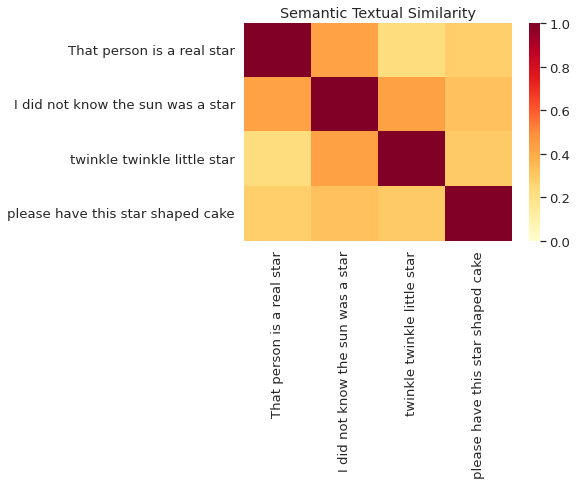

In [ ]:
run_and_plot(messages)   

In [ ]:
random.seed(10)
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
model = hub.load(module_url)

sentence_embeddings = model(messages)
query = "The bright spot in the sky at night is a star"
query_vec = model([query])[0]

for sent in messages:
  sim = cosine(query_vec, model([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)

NotImplementedError: ignored

#### Universal Sentence Encoder - Version 5 (large)

In [ ]:

#run_and_plot(messages)  

INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder-large/5'.
INFO:absl:Downloaded https://tfhub.dev/google/universal-sentence-encoder-large/5, Total size: 577.10MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/google/universal-sentence-encoder-large/5'.


In [ ]:
USE_large = hub.load("https://tfhub.dev/google/universal-sentence-encoder-large/5")

random.seed(10)
query = "The bright spot in the sky at night is a star"
query_vec = USE_large([query])[0]

for sent in messages:
  sim = cosine(query_vec, USE_large([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)

NotImplementedError: ignored

#### SentenceBERT

In [ ]:
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [ ]:
sbert_embeddings = sbert_model.encode(messages)

In [ ]:
sbert_embeddings

array([[ 0.3396648 ,  0.06303982,  1.19456   , ..., -0.3162586 ,
         0.656089  , -0.38746184],
       [ 0.8043224 ,  0.13548696,  0.7025125 , ...,  0.01146583,
        -0.26943353, -0.20085426],
       [-0.1525542 , -0.53553027,  1.086101  , ...,  0.18902795,
         0.32854107, -0.01655852],
       [-0.636414  ,  0.4918545 ,  0.66399497, ..., -0.16381213,
        -0.15338932,  0.24401033]], dtype=float32)

In [ ]:
data_tensor = tf.convert_to_tensor(sentence_embeddings)
data_tensor

<tf.Tensor: shape=(4, 768), dtype=float32, numpy=
array([[ 0.3396646 ,  0.06303983,  1.1945604 , ..., -0.3162585 ,
         0.6560892 , -0.3874618 ],
       [ 0.80432284,  0.13548687,  0.7025126 , ...,  0.01146556,
        -0.26943377, -0.20085429],
       [-0.15255408, -0.53553027,  1.0861007 , ...,  0.18902773,
         0.32854113, -0.01655892],
       [-0.6364146 ,  0.49185452,  0.66399515, ..., -0.1638117 ,
        -0.15338907,  0.24401022]], dtype=float32)>

In [ ]:
embeddings

<tf.Tensor: shape=(4, 512), dtype=float32, numpy=
array([[ 0.02662435, -0.08160678,  0.02703828, ..., -0.03618389,
        -0.0108239 ,  0.06090216],
       [ 0.04543868, -0.05818144,  0.04747436, ..., -0.08572254,
         0.02611468, -0.00911605],
       [ 0.01911808, -0.05354623, -0.05557489, ..., -0.07410324,
         0.01170938, -0.01454415],
       [ 0.03835644, -0.03147315,  0.05023099, ...,  0.03111677,
        -0.02128631,  0.02565159]], dtype=float32)>

In [ ]:
corr = np.inner(embeddings, embeddings)
corr

array([[1.0000002 , 0.42449787, 0.25560984, 0.268629  ],
       [0.42449787, 1.0000001 , 0.3373586 , 0.28562066],
       [0.25560984, 0.3373586 , 1.        , 0.29554626],
       [0.268629  , 0.28562066, 0.29554626, 1.0000001 ]], dtype=float32)

In [ ]:
corr = np.inner(data_tensor, data_tensor)
corr

array([[298.4726 ,  95.75574, 164.7576 , 148.68195],
       [ 95.75574, 267.39664, 127.07945,  97.71159],
       [164.7576 , 127.07945, 301.2486 , 183.30695],
       [148.68195,  97.71159, 183.30695, 289.8155 ]], dtype=float32)

In [ ]:
corr = np.inner(sentence_embeddings, sentence_embeddings)
corr

array([[298.4726 ,  95.75574, 164.7576 , 148.68195],
       [ 95.75574, 267.39664, 127.07945,  97.71159],
       [164.7576 , 127.07945, 301.2486 , 183.30695],
       [148.68195,  97.71159, 183.30695, 289.8155 ]], dtype=float32)

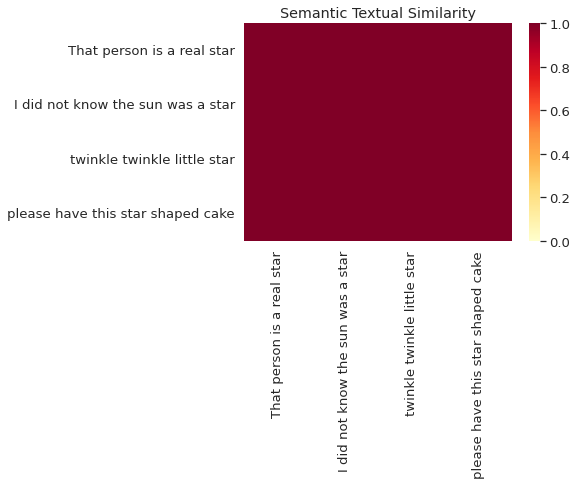

In [ ]:
def run_and_plot(messages_):
  message_embeddings_ = sentence_embeddings
  plot_similarity(messages_, message_embeddings_, 90)

run_and_plot(messages) 

In [ ]:
len(sbert_embeddings)

4

In [ ]:
print('Sample BERT embedding vector - length', len(sbert_embeddings[0]))
#print('Sample BERT embedding vector - note includes negative values', sbert_embeddings[0])

Sample BERT embedding vector - length 768


In [ ]:
query = "The bright spot in the sky at night is a star"
query_vec = sbert_model.encode([query])[0]

In [ ]:
for sent in messages:
  sim = cosine(query_vec, sbert_model.encode([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)

Sentence =  That person is a real star ; similarity =  0.47445163
Sentence =  I did not know the sun was a star ; similarity =  0.58742976
Sentence =  twinkle twinkle little star ; similarity =  0.5684843
Sentence =  please have this star shaped cake ; similarity =  0.45484385


#### stsb-mpnet-base-v2

In [ ]:
model_stsb = SentenceTransformer('sentence-transformers/stsb-mpnet-base-v2')
embeddings = model_stsb.encode(messages)
print(embeddings)

[[-0.03445578 -0.01394643 -0.02894649 ...  0.05570503 -0.03803521
  -0.00376817]
 [ 0.04054029  0.07029089  0.07853473 ... -0.00044308 -0.11139131
   0.17215696]
 [ 0.03485054 -0.11041083 -0.02586307 ...  0.05599928  0.09075734
  -0.10412208]
 [ 0.13847023 -0.09377777  0.00816408 ...  0.02945853  0.01562648
  -0.02523201]]


In [ ]:
random.seed(10)
query = "The bright spot in the sky at night is a star"
query_vec = model_stsb.encode([query])[0]

for sent in messages:
  sim = cosine(query_vec, model_stsb.encode([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)

Sentence =  That person is a real rock rock star ; similarity =  0.33607396
Sentence =  I did not know the sun was a star ; similarity =  0.45300683
Sentence =  twinkle twinkle little star ; similarity =  0.5064859
Sentence =  please have this star shaped cake ; similarity =  0.33788028


#### stsb-roberta-base-v2

In [ ]:
model_roberta = SentenceTransformer('sentence-transformers/stsb-roberta-base-v2')
embeddings = model_roberta.encode(messages)
print(embeddings)

[[ 0.14810185  0.17179722  0.14782578 ...  0.5525834   0.24687488
  -0.35287476]
 [-0.5311145  -0.74811953 -0.40125075 ... -0.17138702  0.4363712
   0.38240394]
 [-1.065474   -0.13631058 -0.52643317 ...  1.0038162   0.22271818
   0.6197931 ]
 [-0.02763196 -0.2112014  -0.7567849  ... -0.23205882  0.83286095
  -0.02993918]]


In [ ]:
random.seed(10)
query = "The bright spot in the sky at night is a star"
query_vec = model_roberta.encode([query])[0]

for sent in messages:
  sim = cosine(query_vec, model_roberta.encode([sent])[0])
  print("Sentence = ", sent, "; similarity = ", sim)

Sentence =  That person is a real rock rock star ; similarity =  0.35476196
Sentence =  I did not know the sun was a star ; similarity =  0.58360124
Sentence =  twinkle twinkle little star ; similarity =  0.69395
Sentence =  please have this star shaped cake ; similarity =  0.3381588
